# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Iqbal Ramadhan Anniswa
- **Email:** [iqbalramad75@gmail.com](mailto:iqbalramad75@gmail.com)
- **ID Dicoding:** [kayabaakihito13](https://www.dicoding.com/users/kayabaakihito13/)

1. bagaimana tingkat PM2.5 dan PM10 dalam 1 tahun tersebut pada Setiap Statiun
2. tingkat AQI terparah pada station yang ada

### Gathering Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
FOLDER_PATH = 'PRSA_Data_20130301-20170228/'


In [22]:
csv_files = glob.glob(os.path.join(FOLDER_PATH, '*.csv'))

# Periksa apakah ada file yang ditemukan
if not csv_files:
    raise FileNotFoundError(f"Tidak ada file CSV yang ditemukan di folder {FOLDER_PATH}")

# Jika ada file yang ditemukan, gabungkan mereka menjadi satu DataFrame
df_merge = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

print("Penggabungan berhasil!")

Penggabungan berhasil!


setelah digabungkan,kita check dulu apakah data tersebut apakah ada data kosong ?

In [23]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


dari sini terdapat data yang kosong,lalu bagaimana kita mengisi data tersebut?

1. kita pisahkan bedasarkan statiun
2. setelah point kedua,kita lihat dengan distribusi data,apakah data tersebut distribusi normal atau tidak
    - a. kalau distribusi normal,kita isi dengan mean
    - b. kalau tidak maka kita isi dengan median
 

In [24]:
list_stations = df_merge["station"].unique()
list_stations

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [25]:
from scipy.stats import ttest_ind
for stasiun in list_stations:
    for variabel in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM","RAIN"]:
        print(stasiun)
        station_data = df_merge[df_merge['station'] == stasiun]

            # Proses pengisian nilai numerik seperti sebelumnya
        non_nan_data = station_data[variabel].dropna()
        nan_data = station_data[variabel].isna()
        t_stat, p_value = ttest_ind(non_nan_data, [station_data[variabel].mean()] * len(non_nan_data), equal_var=False)

        if p_value < 0.005:
            fill_value = station_data[variabel].mean()
        else:
            fill_value = station_data[variabel].median()

        df_merge.loc[(df_merge['station'] == stasiun) & nan_data, variabel] = fill_value

Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Aotizhongxin
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Changping
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dingling
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Dongsi
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Guanyuan
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Gucheng
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Huairou
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Nongzhanguan
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi
Shunyi

oke setelah kita melakukan pembersihan,mari kita check dengan dataframe.info()

In [26]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


lalu dari output diatas,kita tidak punya format untuk date format,jadi mari kita buat

In [27]:
def add_leading_zero(x):
    return x.astype(str).str.zfill(2)
date_format= pd.to_datetime(
    df_merge['year'].astype(str) + '-' +
    add_leading_zero(df_merge['month']) + '-' +
    add_leading_zero(df_merge['day']) + ' ' +
    add_leading_zero(df_merge['hour']) + ':00:00'
)
date_format.head()

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
3   2013-03-01 03:00:00
4   2013-03-01 04:00:00
dtype: datetime64[ns]

dari output diatas udah dalam bentuk format,sehingga format tersebut masih aman
lalu kita masukan pada bentuk di posisi pertama

In [28]:
df_merge.insert(1,"date",date_format)
df_merge.head()

,No,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


dari diatas,kita hapus column `year,month,day,hour and No`

In [29]:
df_merge.drop(["No","year","month","day",'hour'],axis=1,inplace=True)
df_merge.head()

,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Exploratory Data Analysis (EDA)
- Perform summary statistics AQI Variabels in every station`(PM2.5,PM.10,SO2,NO2,CO,O3)`.
- Analyze time series trends in AQI levels.
- AQI values at the station are severe.



### tingkat PM 2.5 dan PM 10 pada 1 tahun

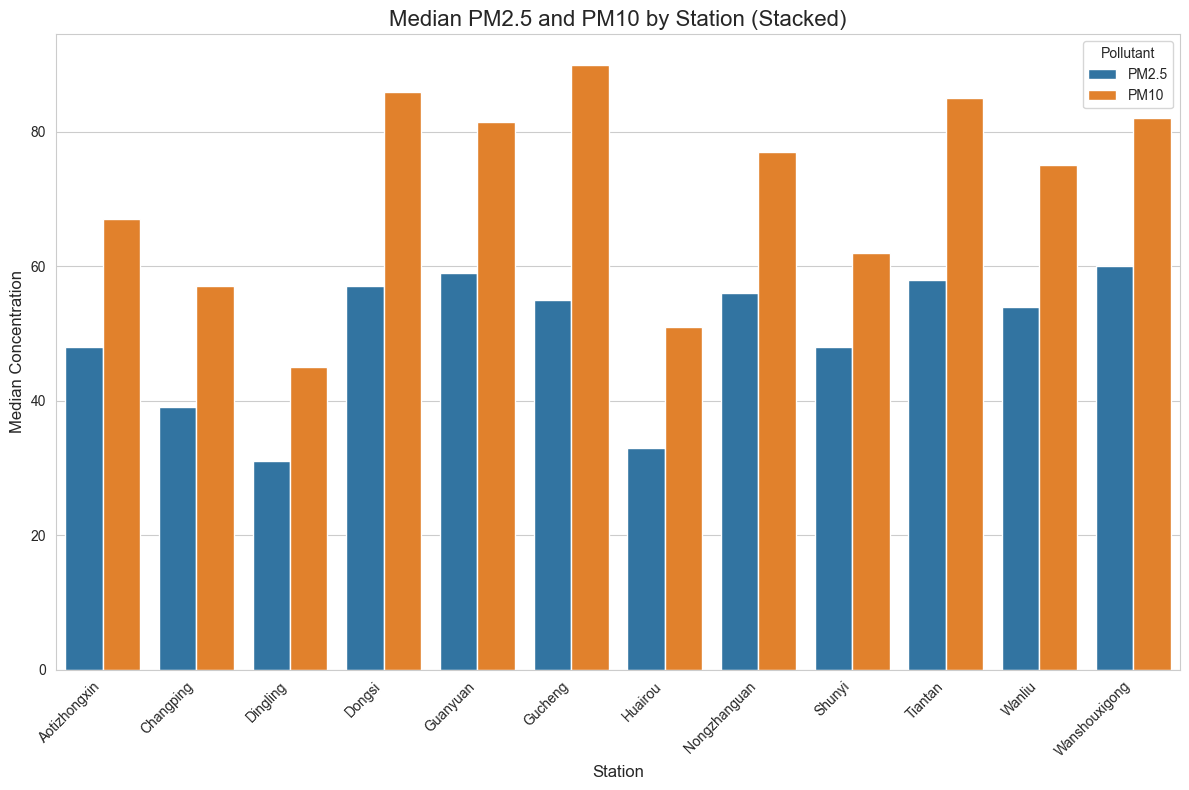

In [46]:
# Record PM 2.5 and PM 10 for the last year (2017)
record_pm = df_merge[df_merge["date"].dt.year == 2017].copy()
record_pm['year'] = record_pm['date'].dt.year

# Calculate median PM2.5 and PM10 by station
median_pm2_5_by_station = record_pm.groupby('station')['PM2.5'].median().reset_index()
median_pm10_by_station = record_pm.groupby('station')['PM10'].median().reset_index()

# Merge the two datasets on 'station'
df_stacked = pd.merge(median_pm2_5_by_station, median_pm10_by_station, on='station', suffixes=('_PM2_5', '_PM10'))

# Melt the dataframe to make it suitable for a stacked bar plot
df_melted = pd.melt(df_stacked, id_vars='station', value_vars=['PM2.5', 'PM10'], 
                   var_name='Pollutant', value_name='Value')

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a stacked bar plot
sns.barplot(x='station', y='Value', hue='Pollutant', data=df_melted)

# Add plot title and labels
plt.title('Median PM2.5 and PM10 by Station (Stacked)', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Median Concentration', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


dari sini kita lihat bahwa PM 10 tersebut kota Gucheng merupakan kota dengan PM10 paling terbesar sedangkan PM2.5 ialah Wanshouxigong

### lalu buatkan fitur AQI terlebih dahulu

In [31]:
# oke kita buat dulu parameter AQI presentase value
def calculate_aqi(concentration, pollutant):
    """
    Calculates the AQI for a given pollutant concentration.

    Args:
        concentration: The concentration of the pollutant.
        pollutant: The name of the pollutant ('NO2', 'PM10', 'PM2.5', or 'O3').

    Returns:
        The AQI value and its corresponding category.
    """

    if pollutant == 'NO2':
        breakpoints = [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 2049)]
        categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
    elif pollutant == 'PM10':
        breakpoints = [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 604)]
        categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
    elif pollutant == 'PM2.5':
        breakpoints = [(0, 12.0), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 500.4)]
        categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
    elif pollutant == 'O3':
        breakpoints = [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200)]
        categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']
    else:
        return None, None

    for i, (low, high) in enumerate(breakpoints):
        if low <= concentration <= high:
            aqi = (high - low) / (breakpoints[i][1] - breakpoints[i][0]) * (concentration - low) + low
            category = categories[i]
            return round(aqi), category
    return None,None
# Assuming your DataFrame is named 'df_stack' and has columns 'NO2', 'PM10', 'PM2.5', and 'O3'
df_merge['AQI_NO2'], df_merge['AQI_NO2_Category'] = zip(*df_merge['NO2'].apply(lambda x: calculate_aqi(x, 'NO2')))
df_merge['AQI_PM10'], df_merge['AQI_PM10_Category'] = zip(*df_merge['PM10'].apply(lambda x: calculate_aqi(x, 'PM10')))
df_merge['AQI_PM2.5'], df_merge['AQI_PM2.5_Category'] = zip(*df_merge['PM2.5'].apply(lambda x: calculate_aqi(x, 'PM2.5')))
df_merge['AQI_O3'], df_merge['AQI_O3_Category'] = zip(*df_merge['O3'].apply(lambda x: calculate_aqi(x, 'O3')))

# Calculate the overall AQI (you might need to adjust this based on your specific requirements)
df_merge['AQI'] = df_merge[['AQI_NO2', 'AQI_PM10', 'AQI_PM2.5', 'AQI_O3']].max(axis=1)

print(df_merge.head())

                 date  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1 2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2 2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3 2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4 2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  ...       station AQI_NO2  AQI_NO2_Category AQI_PM10  \
0 -18.8  ...  Aotizhongxin     7.0              Good      4.0   
1 -18.2  ...  Aotizhongxin     7.0              Good      8.0   
2 -18.2  ...  Aotizhongxin    10.0              Good      7.0   
3 -19.4  ...  Aotizhongxin    11.0              Good      6.0   
4 -19.5  ...  Aotizhongxin    12.0              Good      3.0   

   AQI_PM10_Category AQI_PM2.5  AQI_PM2.5_Category AQI_O3  \
0               Good       4.0                Good   77.0   
1               Good    

setelah kita buat dengan AQI Value,mari kita melihat perfomace dengan cara summary statitic AQI total dengan AQI tiap variabel

In [32]:
summary_stats_all_stations = df_merge[['AQI_NO2', 'AQI_PM10', 'AQI_PM2.5', 'AQI_O3', 'AQI']].agg(['mean', 'median', 'std', 'min', 'max'])

# Menghitung modus untuk semua stasiun
mode_stats_all_stations = df_merge[['AQI_NO2', 'AQI_PM10', 'AQI_PM2.5', 'AQI_O3', 'AQI']].mode().iloc[0]

# Menampilkan hasil
print("Summary Statistics for AQI (All Stations Combined):")
print("Mean:\n", summary_stats_all_stations.loc['mean'])
print("Median:\n", summary_stats_all_stations.loc['median'])
print("Mode:\n", mode_stats_all_stations)
print("Std Dev:\n", summary_stats_all_stations.loc['std'])
print("Min:\n", summary_stats_all_stations.loc['min'])
print("Max:\n", summary_stats_all_stations.loc['max'])

Summary Statistics for AQI (All Stations Combined):
Mean:
 AQI_NO2       50.379662
AQI_PM10     103.156431
AQI_PM2.5     78.172508
AQI_O3        51.113963
AQI          121.937229
Name: mean, dtype: float64
Median:
 AQI_NO2      43.0
AQI_PM10     82.0
AQI_PM2.5    55.0
AQI_O3       43.0
AQI          99.0
Name: median, dtype: float64
Mode:
 AQI_NO2      25.0
AQI_PM10      6.0
AQI_PM2.5     3.0
AQI_O3        2.0
AQI          61.0
Name: 0, dtype: float64
Std Dev:
 AQI_NO2      34.718354
AQI_PM10     87.438873
AQI_PM2.5    76.601863
AQI_O3       45.575859
AQI          78.448007
Name: std, dtype: float64
Min:
 AQI_NO2      1.0
AQI_PM10     2.0
AQI_PM2.5    2.0
AQI_O3       0.0
AQI          2.0
Name: min, dtype: float64
Max:
 AQI_NO2      290.0
AQI_PM10     604.0
AQI_PM2.5    500.0
AQI_O3       200.0
AQI          604.0
Name: max, dtype: float64


dari  output dilihat bahwa 
- AQI yang dihasilkan kebanyakan ialah 61.0 score

oke dari sana sesuai dengan pertanyaan EDA,bagaimana dengan Correlation

In [33]:
correlation_matrix = df_merge[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.879385,0.478184,0.659287,0.767196,-0.148275
PM10,0.879385,1.000000,0.458991,0.646626,0.686276,-0.110537
SO2,0.478184,0.458991,1.000000,0.492940,0.523865,-0.162658
NO2,0.659287,0.646626,0.492940,1.000000,0.688695,-0.464803
CO,0.767196,0.686276,0.523865,0.688695,1.000000,-0.303979
O3,-0.148275,-0.110537,-0.162658,-0.464803,-0.303979,1.000000


kalau begitu,bagaimana visualnya antara variabel untuk memperhitungkan AQI

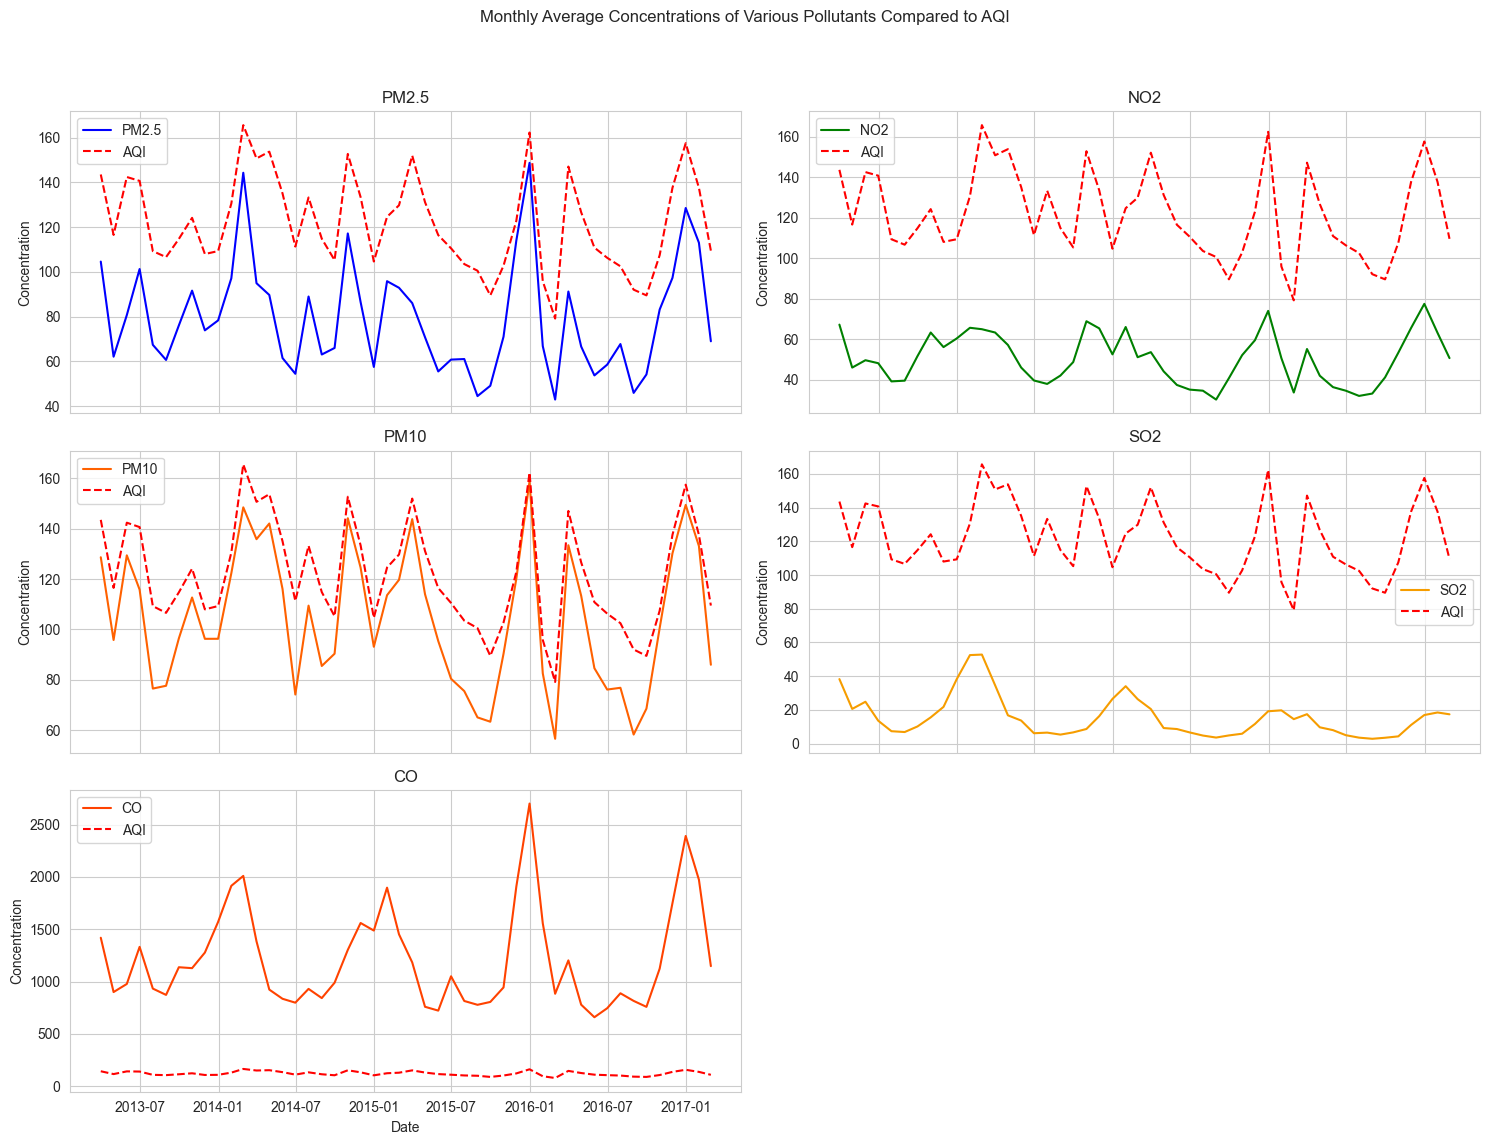

In [34]:
# Data time series
data_time_series = df_merge[['date', 'PM2.5', 'NO2', 'PM10', 'SO2', 'CO', 'O3', 'AQI']].set_index('date').resample('M').mean()

# Membuat subplot
fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Membuat list untuk nama variabel dan warna
variables = ['PM2.5', 'NO2', 'PM10', 'SO2', 'CO', 'O3']
colors = ['blue', 'green', '#ff6100', '#f69d00', '#ff4200', '#d55a00', '#4dff00']

# Loop untuk membuat subplot
for i, (var, color) in enumerate(zip(variables[:-1], colors[:-1])):  # Menghindari AQI di sini
    ax = axs[i // 2, i % 2]
    ax.plot(data_time_series.index, data_time_series[var], label=f'{var}', color=color)
    ax.plot(data_time_series.index, data_time_series['AQI'], label='AQI', color='red', linestyle='--')  # AQI dengan warna merah dan garis putus-putus
    ax.set_title(var)
    ax.set_ylabel('Concentration')
    ax.legend()

# Menghapus subplot yang tidak digunakan
for j in range(len(variables) - 1, 3 * 2):
    fig.delaxes(axs.flatten()[j])

# Menambahkan label untuk sumbu x dan judul figure
plt.xlabel('Date')
plt.suptitle('Monthly Average Concentrations of Various Pollutants Compared to AQI')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Untuk menyesuaikan layout dengan title

plt.show()

### Score tertinggi AQI pada statiun

score tertinggi tersebut guna mengetahui statiun mana yang mempunyai tingkat AQI tertinggi

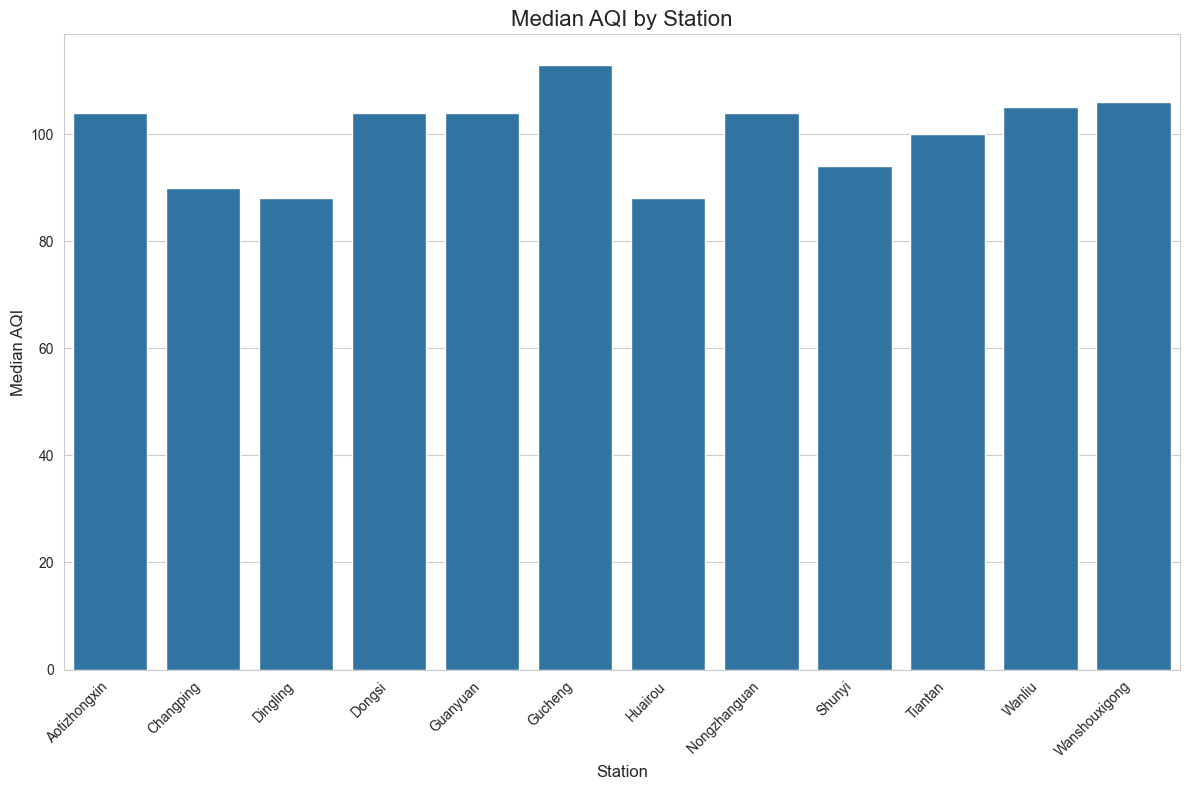

In [35]:
# Calculate median AQI for each station
median_aqi_by_station = df_merge.groupby('station')['AQI'].median().reset_index()

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Create a bar plot for median AQI by station
sns.barplot(x='station', y='AQI', data=median_aqi_by_station)

# Add plot title and labels
plt.title('Median AQI by Station', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Median AQI', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

dari visual tersebut,bahwa kota dengan AQI tertinggi/ kualitas udara buruk terdapat di kota Gucheng.

## Conclusion

### Question 1
- Ditemukan bahwa **Air Quality Index (AQI)** lebih dipengaruhi oleh partikel debu halus, baik **PM2.5** maupun **PM10**, dibandingkan dengan **SO2**, **NO2**, dan **CO**.

### Question 2
- Dari analisis pada seluruh stasiun di kota Beijing dan seluruh China, kota **Gucheng** memiliki kualitas udara yang paling buruk. 
  Oleh karena itu, pemerintah dapat mempertimbangkan kebijakan untuk mengurangi polusi udara di kota tersebut.
